In [2]:
import xarray as xr
import numpy as np
import os
os.chdir("/home/nma/HDD/archives/outs/")
import matplotlib.pyplot as plt
import cartopy 
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature


dirs = "/home/nma/HDD/archives/outs/ocnm*"

#shape_feature = ShapelyFeature(reader.geometries(), ccrs.PlateCarree(), facecolor="lime", edgecolor='black', lw=1)


ocns = xr.open_mfdataset(dirs,concat_dim="Time")

/home/nma/nma/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


[]

/home/nma/nma/lib/python3.8/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


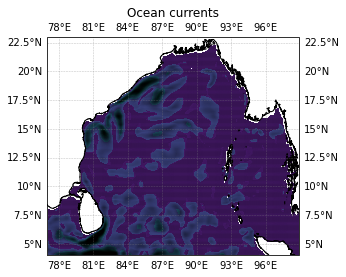

In [3]:
import cartopy.feature as cfeature



u = ocns.u.values[30,0,:,:-1]
v = ocns.v.values[30,0,1:,:]

speed = np.sqrt(u*u + v*v)
#plt.contourf(speed)


fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')


xq,yh = ocns.xq.values,ocns.yh.values

scale = 1e05
x2d,y2d = np.meshgrid(xq,yh)


u = u*np.cos(2 * x2d[:,:-1] / scale + 3 * y2d[:,:-1]/scale)
v = v*np.cos(6*x2d[:,:-1]/scale)


ax.contourf(xq[:-1],yh,speed)
ax.quiver(x2d[:,:-1][::],y2d[:,:-1][::],u[::],v[::],color='black')
#ax.coastlines('110m', linewidth=0.8)
ax.add_feature(cfeature.GSHHSFeature('full', edgecolor='black'))

#plt.colorbar(ax=ax)
plt.title("Ocean currents")
#plt.savefig("test.png",dpi=500)
plt.plot()